#بسم الله الرحمن الرحيم

In [1]:
!pip install kaggle

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/brain-mri-images-for-brain-tumor-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

brain-mri-images-for-brain-tumor-detection.zip	kaggle.json  sample_data
brain_tumor_dataset				no	     yes


In [11]:
!cd brain_tumor_dataset && ls

no  yes


In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
no_tumor = os.listdir('/content/brain_tumor_dataset/no')
print(no_tumor[0:5])

['N21.jpg', '20 no.jpg', 'no 9.png', 'no 7.jpeg', '14 no.jpg']


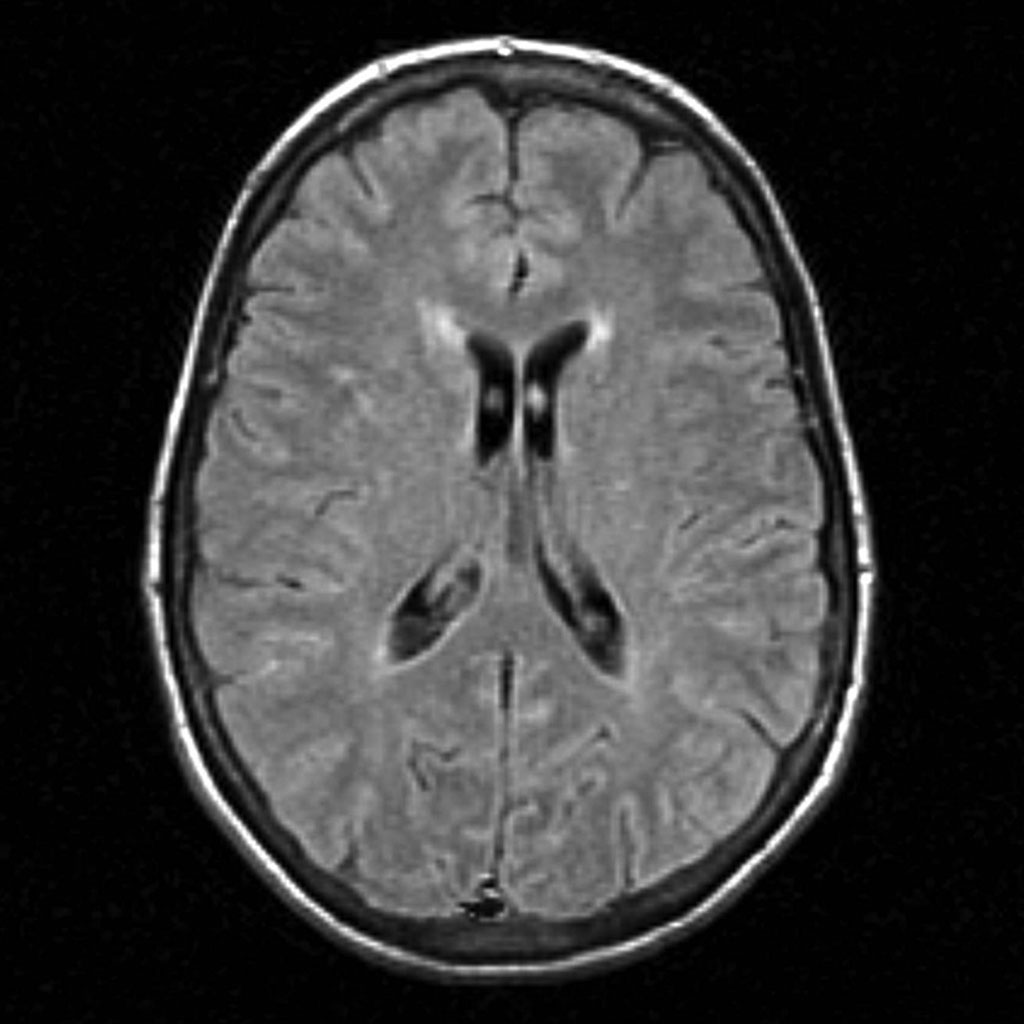

In [17]:
cv2_imshow(cv2.imread('/content/brain_tumor_dataset/no/'+no_tumor[0]))

In [20]:
yes_tumor = os.listdir('/content/brain_tumor_dataset/yes')
print(yes_tumor[0:5])

['Y32.jpg', 'Y194.jpg', 'Y44.JPG', 'Y182.JPG', 'Y254.jpg']


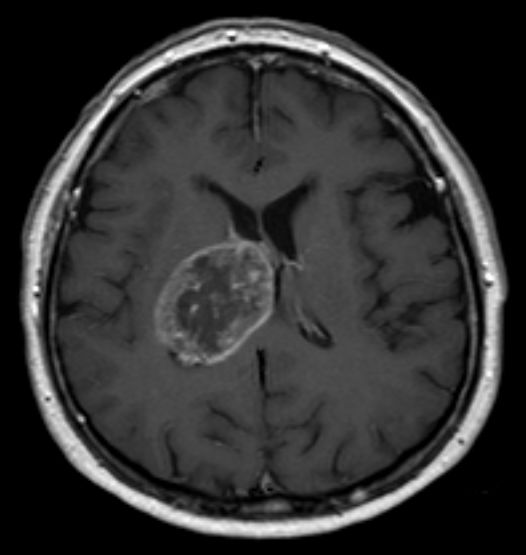

In [19]:
cv2_imshow(cv2.imread('/content/brain_tumor_dataset/yes/'+yes_tumor[0]))

In [21]:
print('Number of Tumor images:', len(yes_tumor))
print('Number of No-Tumor images:', len(no_tumor))

Number of Tumor images: 155
Number of No-Tumor images: 98


**Creating Labels for the two class of Images**

Tumor --> 1

No Tumor --> 0

In [23]:
# create the labels

Tumor_labels = [1]*155

NoTumor_labels = [0]*98

In [24]:
print(Tumor_labels[0:5])

print(NoTumor_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [26]:
print(len(Tumor_labels))
print(len(NoTumor_labels))

155
98


In [27]:
labels = Tumor_labels + NoTumor_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

253
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


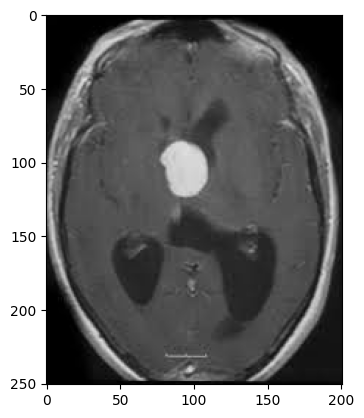

In [28]:
# displaying with Tumor image
img = mpimg.imread('/content/brain_tumor_dataset/yes/Y254.jpg')
imgplot = plt.imshow(img)
plt.show()

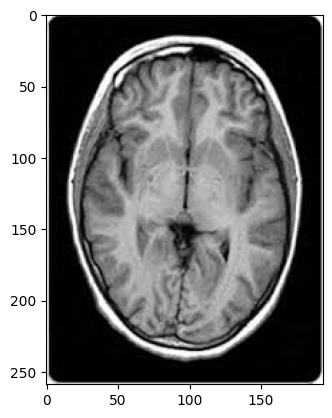

In [33]:
# displaying with Tumor image
img = mpimg.imread('/content/brain_tumor_dataset/no/20 no.jpg')
imgplot = plt.imshow(img)
plt.show()

In [52]:
# Convert images to numpy arrays+

Yes_path = '/content/brain_tumor_dataset/yes/'
No_path = '/content/brain_tumor_dataset/no/'

IMG_SIZE = 64

data = []
labels = []

def ImagesLoading(path, label):
    for image in os.listdir(path):
        if image.lower().endswith(('.jpg', '.jpeg')):
            full_path = os.path.join(path, image)
            img = cv2.imread(full_path, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            data.append(img)
            labels.append(label)

ImagesLoading(Yes_path, label=1)
ImagesLoading(No_path, label=0)

In [53]:
type(data)

list

In [54]:
len(data)

251

In [57]:
data[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [59]:
data[0].shape

(64, 64, 3)

In [60]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [61]:
type(X)

numpy.ndarray

In [62]:
print(X.shape)
print(Y.shape)

(251, 64, 64, 3)
(251,)


In [63]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Train Test Split**

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(251, 64, 64, 3) (200, 64, 64, 3) (51, 64, 64, 3)


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

In [79]:
datagen = ImageDataGenerator( rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
datagen.fit(X_train)
model = Sequential([
    Conv2D(128, (5,5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Conv2D(32, (3,3), activation='relu'),
    # MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
# opt = Adam(learning_rate=0.000006)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.000006,
    decay_steps=200,
    decay_rate=0.99,
    staircase=True
)
opt = Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64), validation_data=(X_test, Y_test), epochs=200)#, callbacks=[early_stop])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6424 - loss: 0.6912 - val_accuracy: 0.6275 - val_loss: 0.6906
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6063 - loss: 0.6905 - val_accuracy: 0.6275 - val_loss: 0.6896
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5435 - loss: 0.6913 - val_accuracy: 0.6275 - val_loss: 0.6890
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5929 - loss: 0.6893 - val_accuracy: 0.6275 - val_loss: 0.6883
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6081 - loss: 0.6886 - val_accuracy: 0.6275 - val_loss: 0.6876
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5976 - loss: 0.6884 - val_accuracy: 0.6275 - val_loss: 0.6869
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6268 - loss: 0.6863 - val_accuracy: 0.6275 - val_loss: 0.6860
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6220 - loss: 0.6854 - val_accuracy: 0.6275 - val_loss: 0.6851
Epoch

In [81]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.7598 - loss: 0.5469
Test Accuracy: 0.7647
Test Loss: 0.5376
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.8072 - loss: 0.5338
Train Accuracy: 0.7750
Train Loss: 0.5476


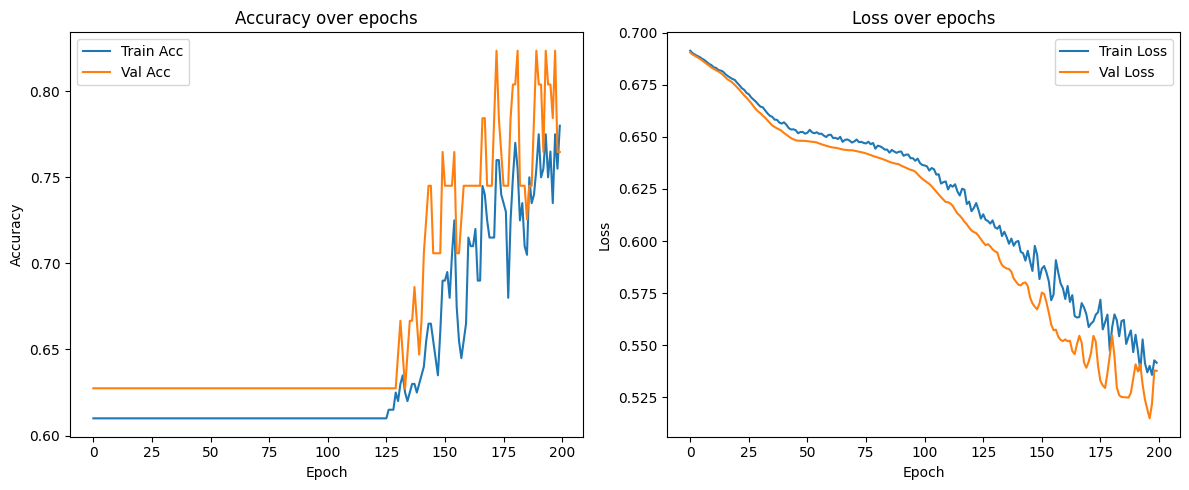

In [82]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print(classification_report(Y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
              precision    recall  f1-score   support

           0       0.64      0.84      0.73        19
           1       0.88      0.72      0.79        32

    accuracy                           0.76        51
   macro avg       0.76      0.78      0.76        51
weighted avg       0.79      0.76      0.77        51



In [86]:
y_predTrain_probs = model.predict(X_train)
y_predTrain = (y_predTrain_probs > 0.5).astype("int32")

print(classification_report(Y_train, y_predTrain))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        78
           1       0.83      0.79      0.81       122

    accuracy                           0.78       200
   macro avg       0.76      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200



In [87]:
roc_auc_score(Y_test, model.predict(X_test))
roc_auc_score(Y_train, model.predict(X_train))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 493ms/step


np.float64(0.848150483396385)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step


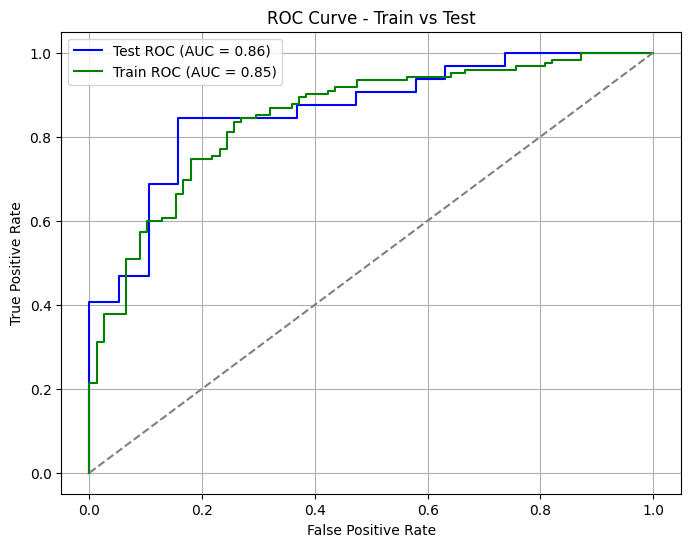

In [89]:
# Get predicted probabilities (not class labels!)
y_test_probs = model.predict(X_test)
y_train_probs = model.predict(X_train)

# Compute ROC curve and AUC for test
fpr_test, tpr_test, _ = roc_curve(Y_test, y_test_probs)
auc_test = roc_auc_score(Y_test, y_test_probs)

# Compute ROC curve and AUC for train
fpr_train, tpr_train, _ = roc_curve(Y_train, y_train_probs)
auc_train = roc_auc_score(Y_train, y_train_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='blue')
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='green')

# Reference line for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train vs Test')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
model.save("TumorPredictionCNN_model.h5")
# from tensorflow.keras.models import load_model
# model = load_model("my_cnn_model.h5")